# Interpolacja wielomianowa

# Błedy i arytmetyka zmiennopozycyjna

Całość kodu można znaleźć w formie online pod linkiem [github.com/KsawerySmoczynski/elementy-metod-numerycznych](https://github.com/KsawerySmoczynski/elementy-metod-numerycznych).

Jest on również dostępny [pod tym linkiem w wersji interaktywnej w Google Colab](https://colab.research.google.com/github/KsawerySmoczynski/elementy-metod-numerycznych/blob/master/Lab2/zmlab2_zadania_i_odpowiedzi.ipynb)  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> <a href="https://github.com/KsawerySmoczynski/elementy-metod-numerycznych/blob/master/Lab2/zmlab2_zadania_i_odpowiedzi"> 

In [1]:
# Żeby odpalić notebook na google colab będziemy musieli zainstalować potrzebne pakiety
import subprocess
import sys
import os

REQUIRED_PACKAGES = ["numpy", "matplotlib", "scipy"]
RUN_IN_COLAB = "COLAB_JUPYTER_IP" in os.environ

def install(packages):
    subprocess.check_call([sys.executable, "-m", "pip", "install", *packages])

if RUN_IN_COLAB:
    install(REQUIRED_PACKAGES)

## Zadania

### Zadanie 1.
Napisz funkcję, która dla zadanego wielomianu $w$, wektora węzłów $(x_0,x_1,\ldots, x_n)$ oraz wektora odpowiadających im wartości $(y_0,y_1,\ldots,y_n)$ sprawdza, czy podany wielomian jest wielomianem Lagrange'a interpolującym te dane.

In [2]:
import numpy as np
import numpy.polynomial.polynomial as P

# Example
x = np.array([6., 7., 8., 9.])
y = np.array([-3., 6., 0., 9.])
w = np.array([-2052, 836.5, -112.5, 5])

In [3]:
def is_lagrange_polynomial(w, x, y) -> bool:
    correct_values = np.allclose(y, P.polyval(x, w))
    # degree of polynomial has to be <= (#x - 1) 
    # => len(w) is degree of polynomial + 1, so 
    # adding 1 to righthandsize yields #x which is exactly len(x)
    correct_degree = len(w) <= len(x) 
    return correct_values and correct_degree

In [4]:
is_lagrange_polynomial(w, x, y)

True

### Zadanie 2.

(* $4$ pkt) Napisz funkcję, która dla wektora $n+1$ różnych punktów $(x_0,x_1,\ldots,x_n)$ i wartości pewnej funkcji $f$ w tych punktach zwraca wektor $(b_0,b_1,\ldots,b_n)$  współczynników wielomianu interpolacyjnego Lagrange'a funkcji $f$ w postaci Newtona opartego na węzłach $x_0,x_1,\ldots,x_n$.

In [5]:
x = np.array([6., 7., 8., 9.])
y = np.array([-3., 6., 0., 9.])

def get_lagrange_coefficients(x, y):
    matrix = np.zeros((len(x), len(x)))
    matrix[:, 0] = y
    
    for i in range(len(x)):
        for j in range(len(x)-i-1):
            matrix[j, i+1] = (matrix[j+1, i] - matrix[j, i]) / (x[j+i+1]-x[j])           
    lagrange_coefficients = matrix[0, :]
    return lagrange_coefficients

### Zadanie 3.
( $*$3 pkt) Napisz funkcję, która dla danych liczb rzeczywistych $a,b$ ($a<b$) i liczby naturalnej $n$ oblicza wartości $n+1$ węzłów Czebyszewa w przedziale $[a,b]$, czyli wartości:
$$x_j=\frac{b-a}{2}\cos(\frac{2j+1}{2n+2}\pi)+\frac{a+b}{2} \text{ dla } j=0,1,\ldots,n.$$


In [6]:
[a, b] = [-1, 1]
n = 1000
[a, b], n

([-1, 1], 1000)

In [7]:
def get_chebyshev_nodes(a, b, n):
    j = np.arange(n+1)
    chebyshev_nodes = (b - a) / 2 * np.cos((2*j + 1) / (2*n + 2) * np.pi) + (a+b) / 2    
    return chebyshev_nodes

In [8]:
chebyshev_nodes = get_chebyshev_nodes(a, b, n)

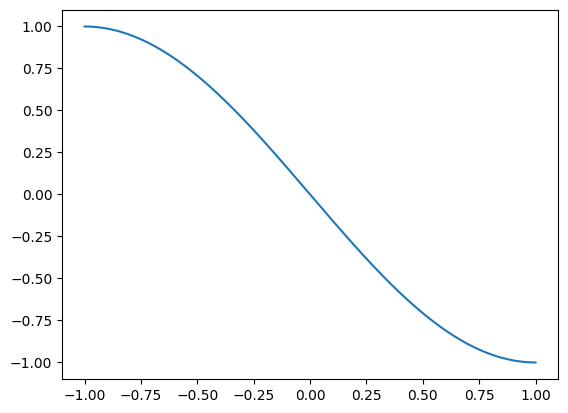

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(np.linspace(a,b,n+1), chebyshev_nodes)
plt.show()

### Zadanie 4.
(* 2 pkt) Rozważmy funkcję $f(x)=\frac{1}{1+x^2}$ w przedziale $I=[-5,5]$.

1. Znajdź współczynniki $b_i$ wielomianu interpolacyjnego Lagrange'a tej funkcji opartego na $6$ równoodległych węzłach w przedziale $I$.
2. Znajdź współczynniki $b_i$ wielomianu interpolacyjnego Lagrange'a tej funkcji opartego na $11$ równoodległych węzłach w przedziale $I$.
3. Narysuj w jednym oknie wykresy funkcji $f$ i dwóch obliczonych w poprzednich podpunktach wielomianów interpolacyjnych tej funkcji w przedziale $I$.

In [10]:
def evaluate_lagrange_base_polynomials(x, x_nodes):
    d0 = np.ones_like(x)
    d1_n = x[:, np.newaxis] - x_nodes[:-1]
    d0_n = np.column_stack([d0, d1_n])
    p0_n = np.cumprod(d0_n, axis=1)
    return p0_n

def evaluate_lagrange(b, p):
    return np.sum((b[np.newaxis, :] * p), axis=1)

In [11]:
f = lambda x: 1/(1+x**2)

In [12]:
# 1. 6 równoodległych węzłów
x1_nodes = np.linspace(-5, 5, 6)
y1_nodes = f(x1_nodes)
b1 = get_lagrange_coefficients(x1_nodes, y1_nodes)

In [13]:
# 2. 11 równoodległych węzłów
x2_nodes = np.linspace(-5, 5, 11)
y2_nodes = f(x2_nodes)
b2 = get_lagrange_coefficients(x2_nodes, y2_nodes)

In [14]:
# 3. Wykresiki
x = np.linspace(-5, 5, 10_000)
# f(x) - czerwony
y_ground_truth = f(x)

# 6 węzłów - zielony
p1 = evaluate_lagrange_base_polynomials(x, x1_nodes)
y_6_nodes_interpolation = evaluate_lagrange(b1, p1)

# 11 węzłów - niebieski
p2 = evaluate_lagrange_base_polynomials(x, x2_nodes)
y_11_nodes_interpolation = evaluate_lagrange(b2, p2)

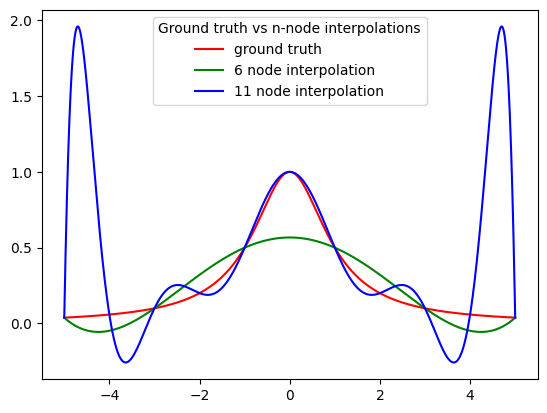

In [15]:
fig, ax = plt.subplots()
ax.plot(x, y_ground_truth, color="r", label="ground truth")
ax.plot(x, y_6_nodes_interpolation, color="g", label="6 node interpolation")
ax.plot(x, y_11_nodes_interpolation, color="b", label="11 node interpolation")
plt.legend(title='Ground truth vs n-node interpolations')
plt.show()

In [16]:
# Verify with lagrange from scipy
from scipy.interpolate import lagrange
y_6_nodes_interpolation_scipy = P.polyval(x, lagrange(x1_nodes, y1_nodes).coef[::-1])
y_11_nodes_interpolation_scipy = P.polyval(x, lagrange(x2_nodes, y2_nodes).coef[::-1])

np.allclose(y_6_nodes_interpolation_scipy, y_6_nodes_interpolation), np.allclose(y_11_nodes_interpolation_scipy, y_11_nodes_interpolation)

(True, True)

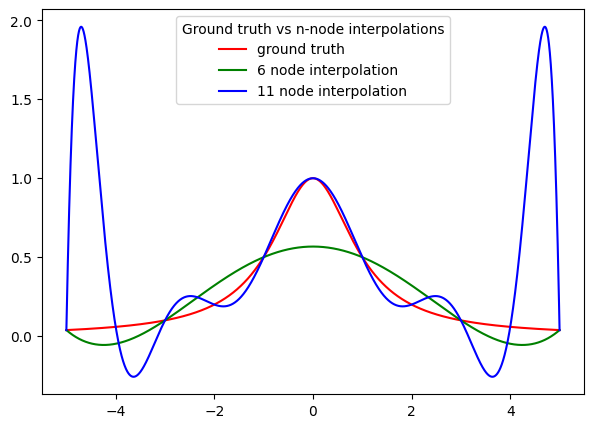

In [17]:
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(x, y_ground_truth, color="r", label="ground truth")
ax.plot(x, y_6_nodes_interpolation_scipy, color="g", label="6 node interpolation")
ax.plot(x, y_11_nodes_interpolation_scipy, color="b", label="11 node interpolation")
plt.legend(title='Ground truth vs n-node interpolations')
plt.show()

### Zadanie 5.

( $*$ 2 pkt) Dla funkcji $f$ z poprzedniego zadania wyznacz współczynniki wielomianów interpolacyjnych Lagrange'a w postaci Newtona opartych na $6$ i $11$ węzłach Czebyszewa w przedziale $[-5,5]$. 

Następnie narysuj w jednym oknie wykresy tych wielomianów i wyjściowej funkcji w tym przedziale.

In [18]:
f = lambda x: 1/(1+x**2)

In [19]:
# 1. 6 węzłów
[a, b] = [-5, 5]
n1 = 6
x1_nodes = get_chebyshev_nodes(a, b, n1)
y1_nodes = f(x1_nodes)
b1 = get_lagrange_coefficients(x1_nodes, y1_nodes)

In [20]:
# 2. 11 węzłów
[a, b] = [-5, 5]
n2 = 11
x2_nodes = get_chebyshev_nodes(a, b, n2)
y2_nodes = f(x2_nodes)
b2 = get_lagrange_coefficients(x2_nodes, y2_nodes)

In [21]:
# 3. Wykresiki
x = np.linspace(-5, 5, 10_000)
# f(x) - czerwony
y_ground_truth = f(x)

# 6 węzłów - zielony
p1 = evaluate_lagrange_base_polynomials(x, x1_nodes)
y_6_nodes_interpolation = evaluate_lagrange(b1, p1)

# 11 węzłów - niebieski
p2 = evaluate_lagrange_base_polynomials(x, x2_nodes)
y_11_nodes_interpolation = evaluate_lagrange(b2, p2)

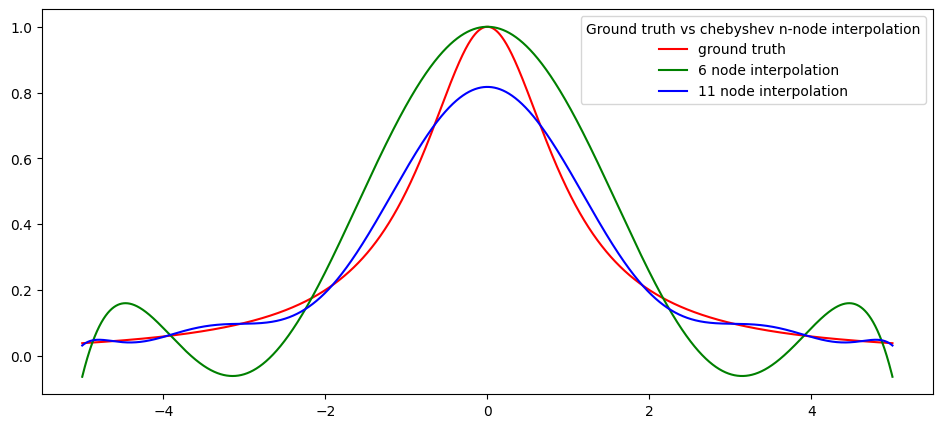

In [22]:
fig, ax = plt.subplots(figsize=(11.5,5))
ax.plot(x, y_ground_truth, color="r", label="ground truth")
ax.plot(x, y_6_nodes_interpolation, color="g", label="6 node interpolation")
ax.plot(x, y_11_nodes_interpolation, color="b", label="11 node interpolation")
plt.legend(title='Ground truth vs chebyshev n-node interpolation')
plt.show()